### Example experiments showing systemic exclusion reduction with randomization when claims are known

In [1]:
from claims_known import experiment
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
e = experiment("normal", 0.5, 0.15)
normal = e.systemic_exclusion(partial=0, selection_rate=0.5, noise_std=0.025)

e = experiment("inv_normal", 0.5, 0.15)
inv_normal = e.systemic_exclusion(partial=0, selection_rate=0.5, noise_std=0.025)

e = experiment("uniform")
uniform = e.systemic_exclusion(partial=0, selection_rate=0.5, noise_std=0.025)

e = experiment("pareto", 2, 1)
pareto = e.systemic_exclusion(partial=0, selection_rate=0.5, noise_std=0.025)

e = experiment("inv_pareto", 2, 1)
inv_pareto = e.systemic_exclusion(partial=0, selection_rate=0.5, noise_std=0.025)

100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 177.90it/s]


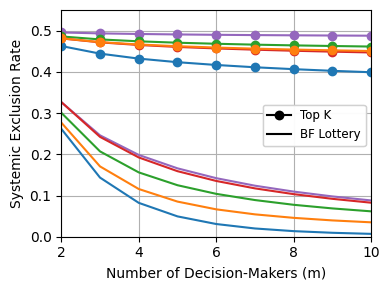

In [3]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(normal["m"], normal['determ'], marker="o", color="#1f77b4")
plt.plot(inv_normal["m"], inv_normal['determ'], marker="o", color="#9467bd")
plt.plot(uniform["m"], uniform['determ'], marker="o", color="#2ca02c")
plt.plot(pareto["m"], pareto['determ'], marker="o", color="#d62728")
plt.plot(inv_pareto["m"], inv_pareto['determ'], marker="o", color="#ff7f0e")

plt.plot(normal["m"], normal['random'], color="#1f77b4")
plt.plot(inv_normal["m"], inv_normal['random'], color="#9467bd")
plt.plot(uniform["m"], uniform['random'], color="#2ca02c")
plt.plot(pareto["m"], pareto['random'], color="#d62728")
plt.plot(inv_pareto["m"], inv_pareto['random'], color="#ff7f0e")

plt.xlim([2,10])
plt.ylim([0,0.55])
plt.ylabel("Systemic Exclusion Rate")
plt.xlabel("Number of Decision-Makers (m)")

blue_line = mlines.Line2D([], [], color='k', marker="o", label="Top K")
blue_line2 = mlines.Line2D([], [], color='k', label="BF Lottery")

first_legend = plt.legend(handles=[blue_line, blue_line2], loc=(0.65,0.4), fontsize=8.5)
ax = plt.gca().add_artist(first_legend)

plt.grid()
plt.tight_layout()
plt.show()